<h1>AI Face Mask Detector - Project Assignment <h1>
<h2> COMP 6721 Applied AI <h2>
<h3>    Vishanth Surresh    <h3>
<h3>    Tejaswini Devireddy  <h3>
<h4> Goal is to to develop a Deep Learning CNN model using PyTorch and train it to recognize five different classes <h4>

In [3]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [4]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

<h4> Renaming Images <h4>

In [5]:
#import os
 
#path = os.chdir("C:/Users/visha/Desktop/Images")

#i=0
#for file in os.listdir(path):
    #new_file_name = "surgical{}.jpg".format(i+324)
    #os.rename(file,new_file_name)
    #i = i+1

<h4> Creation of Key value pair <h4>

In [7]:
from tqdm import tqdm
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

maskdataframe = pd.DataFrame()
dataset_path = Path('C:/Users/visha/Desktop/Applied AI - Project 1/dataset')
nomask = dataset_path/'no'
N95mask = dataset_path/'N95'
clothmask = dataset_path/'cloth'
surgicalmask = dataset_path/'surgical'
n95withvalve = dataset_path/'N95_with_valve'

for imagepath in tqdm(list(nomask.iterdir()), desc='no'):
    maskdataframe = maskdataframe.append({
        'image': str(imagepath),
        'mask': 0
    }, ignore_index=True)
    
for imagepath in tqdm(list(clothmask.iterdir()), desc='cloth'):
    maskdataframe = maskdataframe.append({
        'image': str(imagepath),
        'mask': 1
    }, ignore_index=True)

for imagepath in tqdm(list(N95mask.iterdir()), desc='N95'):
    maskdataframe = maskdataframe.append({
        'image': str(imagepath),
        'mask': 2
    }, ignore_index=True)

for imagepath in tqdm(list(surgicalmask.iterdir()), desc='surgical'):
    maskdataframe = maskdataframe.append({
        'image': str(imagepath),
        'mask': 3
    }, ignore_index=True)


for imagepath in tqdm(list(n95withvalve.iterdir()), desc='N95_with_valve'):
    maskdataframe = maskdataframe.append({
        'image': str(imagepath),
        'mask': 4
    }, ignore_index=True)
        

print("Total Number of Images for all Categories:",len(maskdataframe))
data_frame = 'C:/Users/visha/Desktop/Applied AI - Project 1/dataset/dataset.pickle'
print(f'Saving Dataframe to: {data_frame}')
maskdataframe.to_pickle(data_frame)

N95_with_valve: 100%|██████████████████████████████████████████████████████████████| 388/388 [00:00<00:00, 1191.71it/s]

Total Number of Images for all Categories: 1989
Saving Dataframe to: C:/Users/visha/Desktop/Applied AI - Project 1/dataset/dataset.pickle


<h4> Reading a pickel File <h4>

In [8]:
import pickle
pickle_file = open("C:/Users/visha/Desktop/Applied AI - Project 1/dataset/dataset.pickle", "rb")
objects = []
while True:
    try:
        objects.append(pickle.load(pickle_file))
    except EOFError:
        break
pickle_file.close()
print(objects)

[                                                  image  mask
0     C:\Users\visha\Desktop\Applied AI - Project 1\...   0.0
1     C:\Users\visha\Desktop\Applied AI - Project 1\...   0.0
2     C:\Users\visha\Desktop\Applied AI - Project 1\...   0.0
3     C:\Users\visha\Desktop\Applied AI - Project 1\...   0.0
4     C:\Users\visha\Desktop\Applied AI - Project 1\...   0.0
...                                                 ...   ...
1984  C:\Users\visha\Desktop\Applied AI - Project 1\...   4.0
1985  C:\Users\visha\Desktop\Applied AI - Project 1\...   4.0
1986  C:\Users\visha\Desktop\Applied AI - Project 1\...   4.0
1987  C:\Users\visha\Desktop\Applied AI - Project 1\...   4.0
1988  C:\Users\visha\Desktop\Applied AI - Project 1\...   4.0

[1989 rows x 2 columns]]


<h4> Variable Declarations for Training <h4>

In [9]:
epochs = 15
learning_rate = 0.001 
retrain = False

<h4> Convolution Layer <h4>

In [10]:
from torch import Tensor
from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential, functional, Sigmoid)
import torch
import torch.nn.init as init
import torch.nn as nn

                      
class FaceMaskDetector(nn.Module):
    def __init__(self):
        super(FaceMaskDetector, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(32,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(32,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(64,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1,stride=1),
            nn.BatchNorm2d(64,track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1,inplace=False),
            nn.Linear(8 * 8 * 64, 1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1,inplace=False),
            nn.Linear(512, 5)
        )
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

face_mask_cnn = FaceMaskDetector()
print(face_mask_cnn)

FaceMaskDetector(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer

<h4> Transformations <h4>

In [11]:
from PIL import Image
import numpy as np
from torch import long, tensor
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, RandomOrder

class MaskDetection(Dataset):
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        self.transformations = Compose([
            Resize((32, 32)),
            ToTensor(),
            Normalize((0.5667, 0.5198, 0.4955),(0.229, 0.224, 0.225))
        ])
    
    def __getitem__(self, key):
        if isinstance(key, slice):
            raise NotImplementedError('Slicing Supported..')
        
        row_loc = self.dataFrame.iloc[key]
        image_rgb = Image.open(row_loc['image']).convert('RGB')
        #image = (image - mean) / std
        #print(image)
        return {
          'image': self.transformations(image_rgb),
          'mask': tensor([row_loc['mask']], dtype=long),
          'path': row_loc['image']
        }
    
    def __len__(self):
        return len(self.dataFrame.index)

<h4> K Folds, Entropy Loss <h4>

3.0    401
0.0    400
1.0    400
2.0    400
4.0    388
Name: mask, dtype: int64


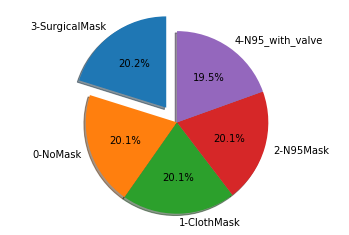

In [12]:
from sklearn.model_selection import KFold
from typing import Dict, List, Union
import pandas as pd
import torch
import torch.nn.init as init
from torch.nn import (Conv2d, CrossEntropyLoss, Linear, MaxPool2d, ReLU,Sequential, MSELoss, L1Loss)
from torch.optim import Adam
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
import itertools

def prepare_data(maskdataframe_path) -> None:
        mask_dataframe = pd.read_pickle(maskdataframe_path)
        print(mask_dataframe['mask'].value_counts())
        labels = '3-SurgicalMask','0-NoMask', '1-ClothMask', '2-N95Mask','4-N95_with_valve'
        explode = (0.2,0,0,0,0)
        fig1, ax1 = plt.subplots()
        ax1.pie(mask_dataframe['mask'].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
        ax1.axis('equal')  
        plt.show()
        k_fold = KFold(n_splits=10, shuffle=True)
        training_folds = []
        validation_folds = []
        for training_index, validation_index in k_fold.split(mask_dataframe, mask_dataframe['mask']):
            training_folds.append(MaskDetection(mask_dataframe.iloc[training_index]))
            validation_folds.append(MaskDetection(mask_dataframe.iloc[validation_index]))
        return [
            training_folds, validation_folds,CrossEntropyLoss()
            ]

def training_dataloader(train_df) -> DataLoader:
    return DataLoader(train_df, batch_size=32, shuffle=True, num_workers=0)

def validation_dataloader(validate_df) -> DataLoader:
    return DataLoader(validate_df, batch_size=32, num_workers=0)   

training_dfs, validation_dfs, cross_entropy_loss = prepare_data("C:/Users/visha/Desktop/Applied AI - Project 1/dataset/dataset.pickle")

<h4> Model Training <h4>

In [13]:
import warnings
warnings.filterwarnings('ignore')
accuracyvalues = []
training_loss = []

def train_model(train_fold):
    account_list, loss_value_list = ([] for i in range (2))
    optimizer = Adam(face_mask_cnn.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        total, correct, loss_train = 0, 0, 0.0
        for j, data in enumerate(training_dataloader(train_fold), 0):
            inputs, labels = data['image'], data['mask']
            labels = labels.flatten()
            outputs = face_mask_cnn(inputs)
            loss = cross_entropy_loss(outputs, labels)
            loss_value_list.append(loss.item())
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            #training accuracy
            total += labels.size(0)
            _, predicted_values = torch.max(outputs.data, 1) 
            correct += (predicted_values == labels).sum().item() 
            loss_train += loss
        print('Training Loss after epoch {} : {} Accuracy: {:.2f}%'.format(epoch, loss_train,(correct / total) * 100))
        accuracyvalues.append((correct / total) * 100)
        training_loss.append(loss_train.detach().numpy())

<h4> Evaluation Function <h4>

In [14]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate_model(validate_fold):
    prediction_values, actual_values = torch.tensor([]), torch.tensor([])
    for i, data in enumerate(validation_dataloader(validate_fold)):
        inputs, targets = data['image'], data['mask']
        targets = targets.flatten()
        output = face_mask_cnn(inputs)
        output = torch.argmax(output,axis=1)
        prediction_values = torch.cat((prediction_values, output.flatten()), dim=0)
        actual_values = torch.cat((actual_values, targets), dim=0)

    return (confusion_matrix(actual_values.numpy(), prediction_values.numpy()),accuracy_score(actual_values, prediction_values),*precision_recall_fscore_support(actual_values.numpy(), prediction_values.numpy(),average='macro'))

<h4> Training Results <h4>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
fold_outputs = []
fold_con_matrix = np.zeros((5,5))
classes = ['without_mask', 'cloth_mask', 'N95mask', 'surgical_mask','n95_with_valve_mask']

for fold in range(len(training_dfs)):
    print("Running Fold : "+ str(fold+1))
    train_model(training_dfs[fold])
    fold_result = evaluate_model(validation_dfs[fold])
    #conf_mat, acc, pre, recall, f-score
    fold_outputs.append(fold_result[1:-1])
    fold_con_matrix = np.add(fold_con_matrix,fold_result[0])
    if fold != len(training_dfs)-1:
        face_mask_cnn = FaceMaskDetector()
    
report = pd.DataFrame(fold_outputs, columns=['accuracy', 'precision', 'recall', 'f1 - score'])
print()
print("Classification Report")
print(report.mean())
print()

Running Fold : 1
Training Loss after epoch 0 : 66.46826934814453 Accuracy: 52.63%
Training Loss after epoch 1 : 39.76005935668945 Accuracy: 71.23%
Training Loss after epoch 2 : 30.20724105834961 Accuracy: 79.11%
Training Loss after epoch 3 : 26.40045928955078 Accuracy: 81.79%
Training Loss after epoch 4 : 22.210859298706055 Accuracy: 85.42%
Training Loss after epoch 5 : 17.293664932250977 Accuracy: 88.49%
Training Loss after epoch 6 : 14.573005676269531 Accuracy: 90.78%
Training Loss after epoch 7 : 12.738114356994629 Accuracy: 92.07%
Training Loss after epoch 8 : 10.144445419311523 Accuracy: 93.13%
Training Loss after epoch 9 : 8.955055236816406 Accuracy: 94.97%
Training Loss after epoch 10 : 7.085312843322754 Accuracy: 95.70%
Training Loss after epoch 11 : 5.133904457092285 Accuracy: 97.04%
Training Loss after epoch 12 : 6.679214954376221 Accuracy: 95.59%
Training Loss after epoch 13 : 3.5798256397247314 Accuracy: 98.10%
Training Loss after epoch 14 : 4.542369842529297 Accuracy: 97.6

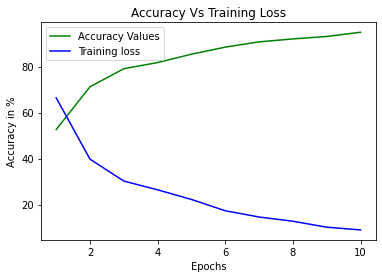

In [16]:
epochvalues = range(1,11)
acc_val = accuracyvalues[:10]
tra_loss = training_loss[:10]
plt.plot(epochvalues, acc_val, 'g', label='Accuracy Values')
plt.plot(epochvalues, tra_loss, 'b', label='Training loss')
plt.title('Accuracy Vs Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

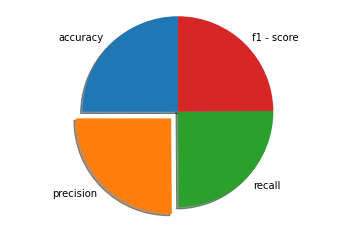

accuracy      76.969697
precision     77.417162
recall        77.043614
f1 - score    76.654952
dtype: float64


In [17]:
labels = 'accuracy', 'precision', 'recall', 'f1 - score'
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(report.mean(), explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(report.mean()*100)

In [18]:
print("Across 10-folds")
print(fold_con_matrix)

Across 10-folds
[[369.   7.  13.   8.   3.]
 [  4. 296.  15.  38.  47.]
 [ 15.  19. 310.  22.  34.]
 [  6.  33.  20. 288.  54.]
 [ 13.  32.  50.  25. 268.]]


<h4> Confusion Matrix Results <h4>

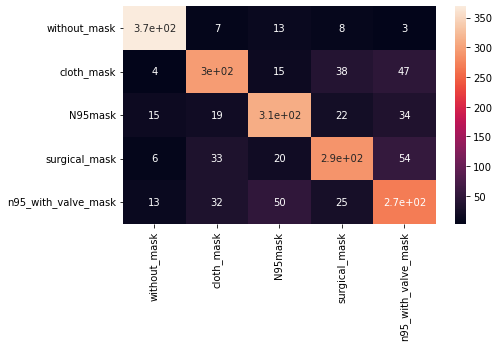

In [19]:
#Plotting Confusion Matrix
df_cm = pd.DataFrame(fold_con_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

<h4> Test Data Prediction <h4>

N95_with_valve: 100%|██████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 1228.72it/s]


Length of the Test_Dataframe 510
C:\Users\visha\Desktop\Applied AI\Project - Part 1\testDataset\random\surgical_masks (99).jpg
Predicted: surgical_mask


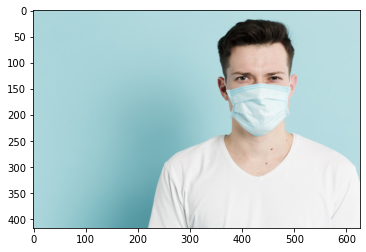

In [21]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

class_mapping_values = {0: "without_mask", 1: "cloth_mask", 2: "N95mask", 3: "surgical_mask",
    4: "n95_with_valve_mask"
}

def prepare_prediction_df():
    test_dataset_path = Path('C:/Users/visha/Desktop/Applied AI/Project - Part 1/testDataset')
    test_randommask_path = test_dataset_path/'random'
    test_dataframe = pd.DataFrame()

    #Appending values to the images - Key value pair
    for imagePath in tqdm(list(test_randommask_path.iterdir()), desc='no'):
        test_dataframe = test_dataframe.append({
            'image': str(imagePath),
            'mask': 0
        }, ignore_index=True)

    for imagePath in tqdm(list(test_randommask_path.iterdir()), desc='cloth'):
        test_dataframe = test_dataframe.append({
            'image': str(imagePath),
            'mask': 1
        }, ignore_index=True)

    for imagePath in tqdm(list(test_randommask_path.iterdir()), desc='N95'):
        test_dataframe = test_dataframe.append({
            'image': str(imagePath),
            'mask': 2
        }, ignore_index=True)
        
    for imagePath in tqdm(list(test_randommask_path.iterdir()), desc='surgical'):
        test_dataframe = test_dataframe.append({
            'image': str(imagePath),
            'mask': 3
        }, ignore_index=True)
        
    for imagePath in tqdm(list(test_randommask_path.iterdir()), desc='N95_with_valve'):
        test_dataframe = test_dataframe.append({
            'image': str(imagePath),
            'mask': 4
        }, ignore_index=True)
    
    #Counts the number of images in each category
    print("Length of the Test_Dataframe",len(test_dataframe.value_counts()))
    return MaskDetection(test_dataframe)

def test_predict():
    test_dataframe = prepare_prediction_df()
    random_sampler = torch.utils.data.RandomSampler(test_dataframe, num_samples=32, replacement=True)
    test_data = iter(DataLoader(test_dataframe, batch_size=32, num_workers=0, sampler=random_sampler)).next()
    inputs,targets = test_data['image'], test_data['mask']
    test_output = face_mask_cnn(inputs)
    test_output = torch.argmax(test_output,axis=1)
    rand_val = random.choice(list(range(0,32)))
    print(test_data['path'][rand_val])
    img = Image.open(test_data['path'][rand_val])
    plt.imshow(np.asarray(img))
    print("Predicted:",class_mapping_values[test_output[rand_val].tolist()])

test_predict()

In [22]:
torch.save(face_mask_cnn.state_dict(),'C:/Users/visha/Desktop/Applied AI - Project 1/Final_model_trained.pkl')